In [1]:
import pandas as pd

# Import dataset from local directory
hdb_resale = pd.read_csv("../../data/raw/01_hdb_resale_transactions.csv")
hdb_resale.head()

block           street_name        town  postal_code    month flat_type  \
0   174   ANG MO KIO AVENUE 4  ANG MO KIO       560174  2015-01    3 ROOM   
1   541  ANG MO KIO AVENUE 10  ANG MO KIO       560541  2015-01    3 ROOM   
2   163   ANG MO KIO AVENUE 4  ANG MO KIO       560163  2015-01    3 ROOM   
3   446  ANG MO KIO AVENUE 10  ANG MO KIO       560446  2015-01    3 ROOM   
4   557  ANG MO KIO AVENUE 10  ANG MO KIO       560557  2015-01    3 ROOM   

  storey_range  floor_area_sqm      flat_model  lease_commence_date  \
0     07 TO 09            60.0        Improved                 1986   
1     01 TO 03            68.0  New Generation                 1981   
2     01 TO 03            69.0  New Generation                 1980   
3     01 TO 03            68.0  New Generation                 1979   
4     07 TO 09            68.0  New Generation                 1980   

   resale_price  latitude   longitude      cbd_dist  min_dist_mrt  
0      255000.0  1.375097  103.837619  10296.855750   1096.947897  
1      275000.0  1.373922  103.855621  10065.227930    847.235690  
2      285000.0  1.373552  103.838169  10118.831550   1176.742184  
3      290000.0  1.367761  103.855357   9383.300907    682.205473  
4      290000.0  1.371626  103.857736   9825.917255    953.047695

## Data Exploratory

To better understand the dataset gotten, I've ulities a library called pandas-profiling that allows me to have generate a basic profile on my data such as correlation matrices , number and percentage of nulls and duplicates in the dataset. The

In [2]:
hdb_resale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194240 entries, 0 to 194239
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   block                194240 non-null  object 
 1   street_name          194240 non-null  object 
 2   town                 194240 non-null  object 
 3   postal_code          194240 non-null  int64  
 4   month                194240 non-null  object 
 5   flat_type            194240 non-null  object 
 6   storey_range         194240 non-null  object 
 7   floor_area_sqm       194240 non-null  float64
 8   flat_model           194240 non-null  object 
 9   lease_commence_date  194240 non-null  int64  
 10  resale_price         194240 non-null  float64
 11  latitude             194240 non-null  float64
 12  longitude            194240 non-null  float64
 13  cbd_dist             194240 non-null  float64
 14  min_dist_mrt         194240 non-null  float64
dtypes: float64(6), in

In [3]:
# install data profiling library
!pip install ydata-profiling

In [4]:
from ydata_profiling import ProfileReport

profile = ProfileReport(hdb_resale, title="HDB Resale Profiling Report")

c:\Users\Shi Min\anaconda3\envs\mlops\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\Shi Min\anaconda3\envs\mlops\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [5]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The above pandas profile shows the count for each vairable in the dataset, number and percentage of duplicates, number of nulls, a heatmap that shows the correlation between all variables and what are the duplicated rows. 

#### Pandas Profilling Findings
1. There are 0.2% of our data is duplicated which needs to be removed. 
2. Target variable "resale price" is skewed to the left which needs to be adjusted when creating model for prediction to allow the model to be able to predict extreme outcomes when necessary.
3. Correlation matrix shows some multicollinearity issues that needs to be addressed by doing feature selection

However, this does not show how resale price are priced at based on different factors. Therefore, below will show some comparision between the variables in the dataset.

In [6]:
# From the above, there are about 0.2% of the data are duplicated which indicates the needs for removal.
hdb_resale.drop_duplicates(inplace=True)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def plot_bar(x, y, df, title):
    plt.figure(figsize=(15, 5))
    sns.barplot(df, x=x, y=y).set(title=title)

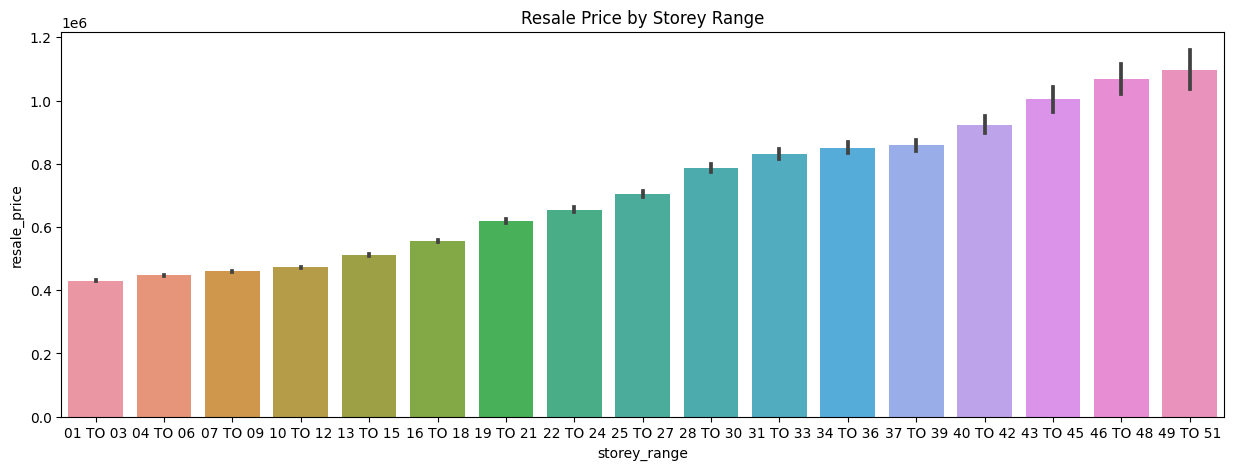

In [9]:
%matplotlib inline

def extract_lower_bound(s):
    return int(s.split(' TO ')[0])

sorted_storeyRange = hdb_resale.sort_values(by='storey_range', key=lambda x: x.apply(extract_lower_bound))

plot_bar(x='storey_range', y='resale_price', df=sorted_storeyRange, title="Resale Price by Storey Range")

To understand if cbd distance and minimum distance to mrt are related, a scatterplot was created. From the scatterplot, it shows that there's a positive correlation between the two variable.

<Axes: xlabel='cbd_dist', ylabel='min_dist_mrt'>

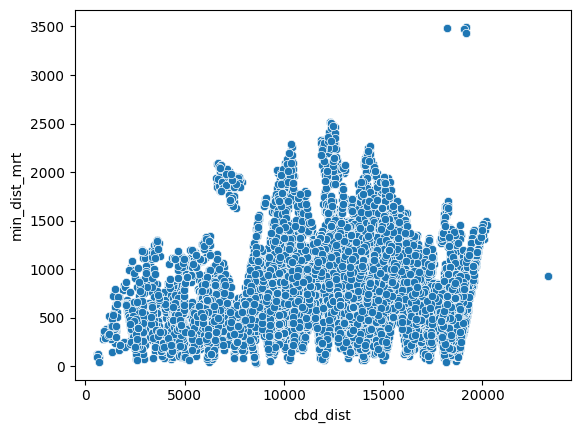

In [10]:
%matplotlib inline
sns.scatterplot(hdb_resale, x='cbd_dist', y='min_dist_mrt')

To better understand what flat type has higher chance of generating a higher resale price, I've created a bar chart. The below bar chart shows that as the flat type improves from 1ROOM to 2ROOm to 3ROOM etc, the resale price increases, which indicates that flat type affects resale price.

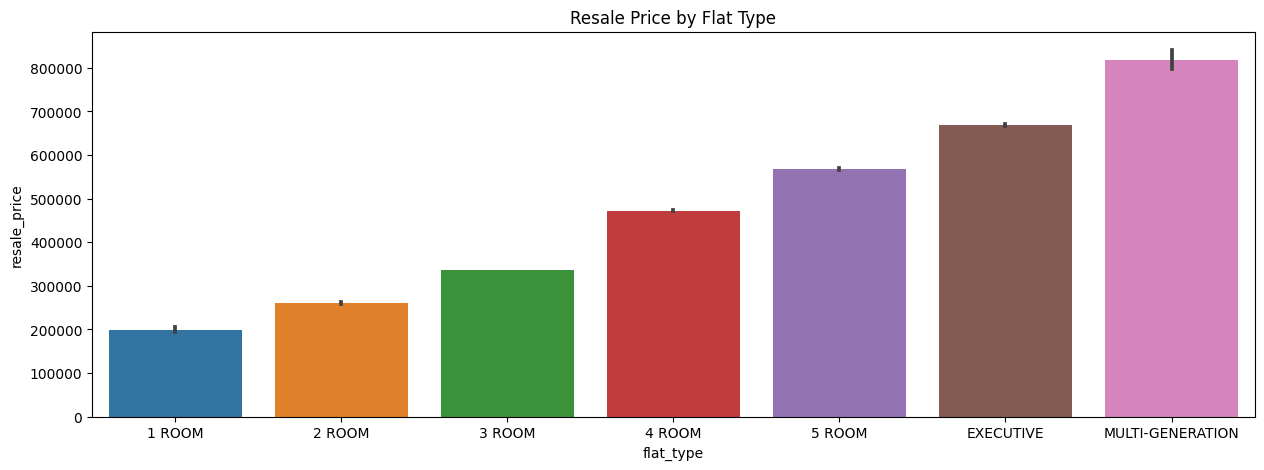

In [11]:
%matplotlib inline

sorted_flatType = hdb_resale.sort_values(by='flat_type')

plot_bar(x='flat_type', y='resale_price', df=sorted_flatType, title="Resale Price by Flat Type")

However, in our dataset there is another variable called floor_area_sqm which can relate to flat type as well. With that when plotted, we can also see that as flat type improves, the floor_area_sqm increases. This results in high chance of correlation between flat_type and floor_area_sqm.

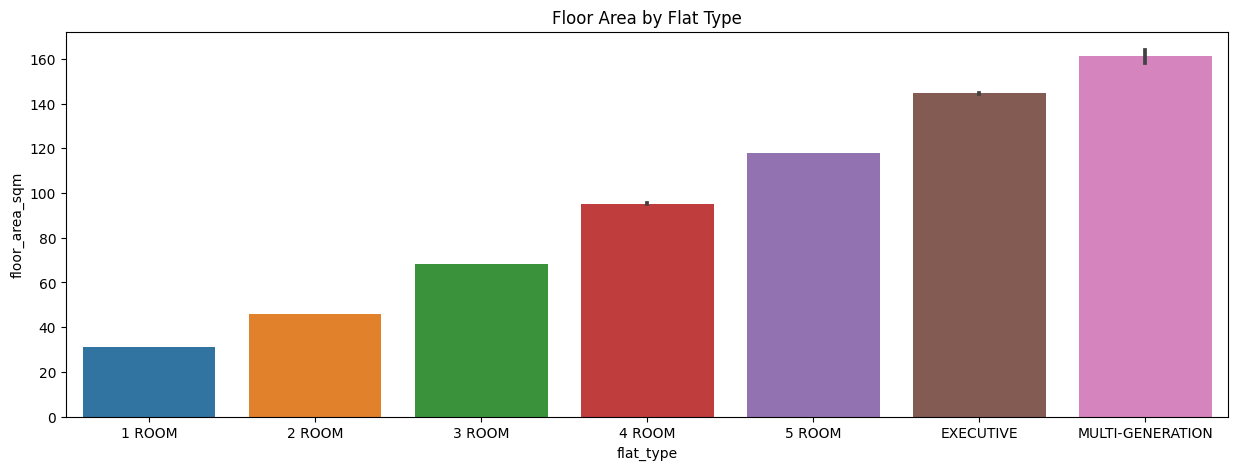

In [12]:
%matplotlib inline

plot_bar(x='flat_type', y='floor_area_sqm',df=sorted_flatType, title="Floor Area by Flat Type")

Below shows the correlation between **numeric** variables in the dataset. It shows which variables are highly correlated and can cause multicollinearity issue which can affect model performance. 

C:\Users\Shi Min\AppData\Local\Temp\ipykernel_17340\1204426434.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = hdb_resale.corr()


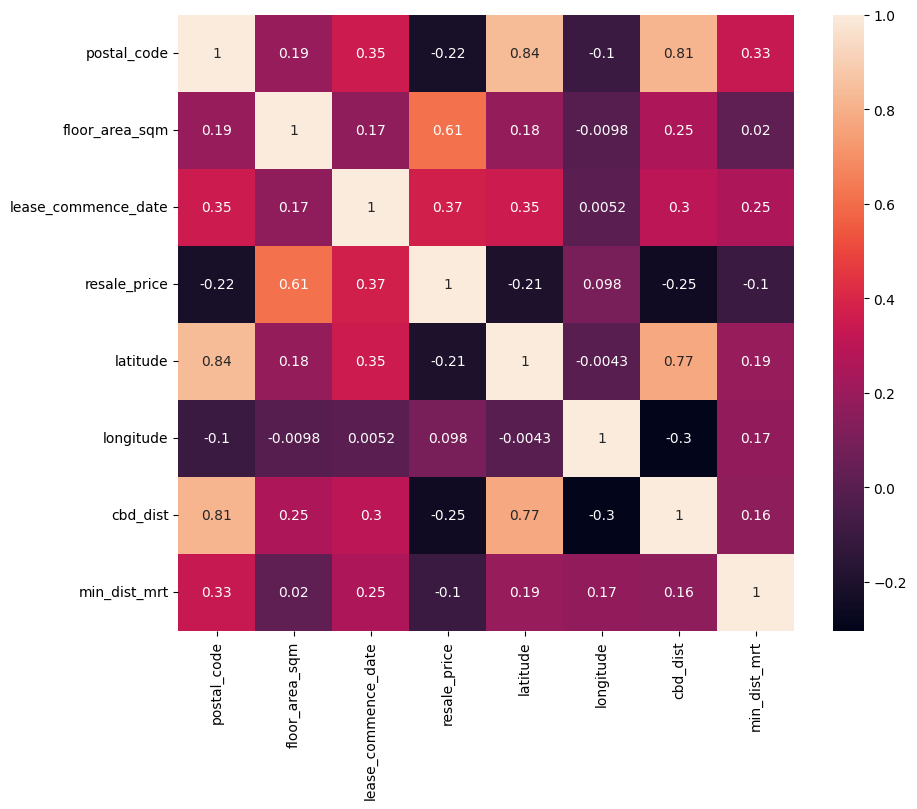

In [13]:
%matplotlib inline

corr = hdb_resale.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, square=True, annot = True)
plt.show()

From the above correlation matrix, the features that can be removed is postal code as it has a high correlation with cbd_dist and longitude. In addition, longitude and latitude can be removed as it is usally used for geographic mapping and not many individual will consider these variable when doing a prediction.

It also shows that our target variable will be affected by lease_commence_date and floor_area_sqm.

## Pycaret Model Pipeline Process
The pycaret setup is set that 

1. it uses resale_price  as the target variable
2. it logs the model creation and pipeline to mlflow using the name "hdb_resale"
3. it normalizes the data 
4. it scales the target variable to be in a normal distribution
5. Ignore feature that should not be included in the model creation

In [14]:
# sample data out for prediction later
hdb_data = hdb_resale.sample(frac=0.9, random_state=42)
hdb_unseen = hdb_resale.drop(hdb_data.index).reset_index(drop=True)

print("Data for Modeling:", hdb_data.shape)
print("Data for Prediction:", hdb_unseen.shape)

Data for Modeling: (174489, 15)
Data for Prediction: (19388, 15)


In [15]:
hdb_data

block           street_name             town  postal_code    month  \
13689    630   WOODLANDS RING ROAD        WOODLANDS       730630  2015-10   
71027    158     HOUGANG STREET 11          HOUGANG       530158  2018-08   
185210    44      CHAI CHEE STREET            BEDOK       461044  2023-03   
17601    137     JALAN BUKIT MERAH      BUKIT MERAH       160137  2015-12   
184091  690D    WOODLANDS DRIVE 75        WOODLANDS       734690  2023-02   
...      ...                   ...              ...          ...      ...   
53240    158    TAMPINES STREET 12         TAMPINES       521158  2017-10   
136362    51    LORONG 6 TOA PAYOH        TOA PAYOH       310051  2021-06   
11363     25        TECK WHYE LANE    CHOA CHU KANG       680025  2015-08   
74928   337A        TAH CHING ROAD      JURONG WEST       611337  2018-10   
95004    804  KING GEORGE'S AVENUE  KALLANG/WHAMPOA       200804  2019-09   

       flat_type storey_range  floor_area_sqm         flat_model  \
13689     4 ROOM     10 TO 12           101.0            Model A   
71027     4 ROOM     04 TO 06           101.0            Model A   
185210    3 ROOM     13 TO 15            68.0     New Generation   
17601     3 ROOM     07 TO 09            59.0           Improved   
184091    4 ROOM     01 TO 03            90.0  Premium Apartment   
...          ...          ...             ...                ...   
53240     4 ROOM     07 TO 09            91.0     New Generation   
136362    3 ROOM     13 TO 15            63.0           Standard   
11363     4 ROOM     07 TO 09            92.0     New Generation   
74928     4 ROOM     16 TO 18            94.0            Model A   
95004     3 ROOM     10 TO 12            59.0           Improved   

        lease_commence_date  resale_price  latitude   longitude      cbd_dist  \
13689                  1998      355000.0  1.434597  103.801501  17655.252170   
71027                  1997      465000.0  1.351640  103.880486   8255.710378   
185210                 1980      342888.0  1.329014  103.925668   9715.326309   
17601                  1975      290000.0  1.278147  103.826959   2761.591535   
184091                 2004      450000.0  1.442616  103.807852  18299.862430   
...                     ...           ...       ...         ...           ...   
53240                  1984      500000.0  1.351415  103.945859  12960.411330   
136362                 1983      293000.0  1.337783  103.852508   6059.154288   
11363                  1979      340000.0  1.377987  103.755188  14990.938000   
74928                  2010      460000.0  1.337700  103.722790  15528.303520   
95004                  1981      350000.0  1.307875  103.860792   2946.439545   

        min_dist_mrt  
13689     664.904607  
71027     865.728467  
185210   1064.637587  
17601     881.315563  
184091    795.827742  
...              ...  
53240    1039.568625  
136362    701.262026  
11363     690.171242  
74928     753.697891  
95004     226.637980  

[174489 rows x 15 columns]

In [16]:
hdb_unseen

block                street_name         town  postal_code    month  \
0       603        ANG MO KIO AVENUE 5   ANG MO KIO       560603  2015-01   
1       471       ANG MO KIO AVENUE 10   ANG MO KIO       560471  2015-01   
2       152        ANG MO KIO AVENUE 5   ANG MO KIO       560152  2015-01   
3       121        ANG MO KIO AVENUE 3   ANG MO KIO       560121  2015-01   
4       223        ANG MO KIO AVENUE 1   ANG MO KIO       560223  2015-01   
...     ...                        ...          ...          ...      ...   
19383  694A         WOODLANDS DRIVE 62    WOODLANDS       731694  2023-07   
19384  293C      BUKIT BATOK STREET 21  BUKIT BATOK       653293  2023-07   
19385  234B                SUMANG LANE      PUNGGOL       822234  2023-07   
19386  221B                SUMANG LANE      PUNGGOL       822221  2023-07   
19387  443A  BUKIT BATOK WEST AVENUE 8  BUKIT BATOK       651443  2023-07   

      flat_type storey_range  floor_area_sqm      flat_model  \
0        3 ROOM     07 TO 09            67.0  New Generation   
1        3 ROOM     07 TO 09            67.0  New Generation   
2        3 ROOM     04 TO 06            82.0  New Generation   
3        3 ROOM     07 TO 09            67.0  New Generation   
4        4 ROOM     04 TO 06            92.0  New Generation   
...         ...          ...             ...             ...   
19383    5 ROOM     10 TO 12           113.0        Improved   
19384    5 ROOM     13 TO 15           113.0        Improved   
19385    4 ROOM     16 TO 18            93.0         Model A   
19386    4 ROOM     04 TO 06            93.0         Model A   
19387    5 ROOM     07 TO 09           112.0        Improved   

       lease_commence_date  resale_price  latitude   longitude      cbd_dist  \
0                     1980      290000.0  1.380201  103.835756  10886.292880   
1                     1979      319000.0  1.363466  103.856703   8917.812406   
2                     1981      340000.0  1.376688  103.840159  10433.424440   
3                     1978      345000.0  1.369706  103.843516   9626.521604   
4                     1978      423000.0  1.366048  103.838123   9299.391335   
...                    ...           ...       ...         ...           ...   
19383                 2018      718000.0  1.439052  103.804396  18027.667460   
19384                 2019      860000.0  1.345371  103.754989  12745.541830   
19385                 2018      570000.0  1.401682  103.891667  13870.914060   
19386                 2018      550000.0  1.401022  103.895065  13929.525380   
19387                 2019      730000.0  1.356533  103.737760  15025.824020   

       min_dist_mrt  
0       1040.755276  
1       1041.758777  
2        770.822487  
3        661.675832  
4       1315.400427  
...             ...  
19383    415.294250  
19384    729.688247  
19385   1183.260967  
19386   1032.425245  
19387   1551.506946  

[19388 rows x 15 columns]

In [17]:
# initalise pycaret model pipeline
from pycaret.regression import *

hdb_exp = setup(data = hdb_data, target = 'resale_price', session_id=123, log_experiment = True, 
                experiment_name = 'hdb_resale', normalize = True, transform_target = True,
                ignore_features = ['longitude', 'latitude', 'flat_type'])

In [18]:
# understand the datatype
hdb_exp.data.dtypes

block                  category
street_name            category
town                   category
postal_code               int32
month                  category
flat_type              category
storey_range           category
floor_area_sqm          float32
flat_model             category
lease_commence_date       int32
latitude                float32
longitude               float32
cbd_dist                float32
min_dist_mrt            float32
resale_price            float32
dtype: object

In [19]:
# see transformed data
hdb_exp.get_config('dataset_transformed')

block  street_name      town  postal_code     month  \
54726  -0.765274     0.335436  1.607838    -1.512542 -0.766680   
126831  0.865896     0.729182  0.407178    -0.086885  0.281605   
112618 -0.716679    -0.336031 -0.831379    -0.463230 -0.551085   
104028 -1.318147     1.101247  0.722559    -0.045534 -0.794750   
176037  0.773428     0.273767  0.755791     1.386145  1.779790   
...          ...          ...       ...          ...       ...   
112379  0.136210     0.349610  0.756074     1.383917 -0.832175   
62601  -0.618444    -0.473442 -0.155142    -1.307261 -0.501988   
144127 -0.511863    -1.337353 -1.385268     1.058244  0.920476   
188479  1.305269     0.189263 -0.838630     0.903358  1.831937   
9961   -0.414718    -0.855952  0.736843    -1.938130 -0.751123   

        storey_range_13 TO 15  storey_range_07 TO 09  storey_range_04 TO 06  \
54726                3.101037              -0.518482              -0.549281   
126831              -0.322473               1.928709              -0.549281   
112618              -0.322473               1.928709              -0.549281   
104028              -0.322473              -0.518482               1.820562   
176037              -0.322473              -0.518482              -0.549281   
...                       ...                    ...                    ...   
112379              -0.322473              -0.518482              -0.549281   
62601               -0.322473              -0.518482               1.820562   
144127              -0.322473              -0.518482               1.820562   
188479              -0.322473              -0.518482               1.820562   
9961                -0.322473              -0.518482              -0.549281   

        storey_range_16 TO 18  storey_range_10 TO 12  ...  \
54726               -0.211611              -0.479925  ...   
126831              -0.211611              -0.479925  ...   
112618              -0.211611              -0.479925  ...   
104028              -0.211611              -0.479925  ...   
176037               4.725654              -0.479925  ...   
...                       ...                    ...  ...   
112379               4.725654              -0.479925  ...   
62601               -0.211611              -0.479925  ...   
144127              -0.211611              -0.479925  ...   
188479              -0.211611              -0.479925  ...   
9961                -0.211611               2.083661  ...   

        flat_model_Model A-Maisonette  flat_model_Premium Apartment Loft  \
54726                       -0.042672                          -0.023427   
126831                      -0.042672                          -0.023427   
112618                      -0.042672                          -0.023427   
104028                      -0.042672                          -0.023427   
176037                      -0.042672                          -0.023427   
...                               ...                                ...   
112379                      -0.042672                          -0.023427   
62601                       -0.042672                          -0.023427   
144127                      -0.042672                          -0.023427   
188479                      -0.042672                          -0.023427   
9961                        -0.042672                          -0.023427   

        flat_model_Multi Generation  flat_model_Improved-Maisonette  \
54726                     -0.017872                       -0.010707   
126831                    -0.017872                       -0.010707   
112618                    -0.017872                       -0.010707   
104028                    -0.017872                       -0.010707   
176037                    -0.017872                       -0.010707   
...                             ...                             ...   
112379                    -0.017872                       -0.010707   
62601                     -0.017872                    

In [20]:
# compare across all models available in pycaret regression module
# excluded random forest regressor and extra tree due to hardware capabilities 
best = compare_models(exclude=['rf', 'et'])

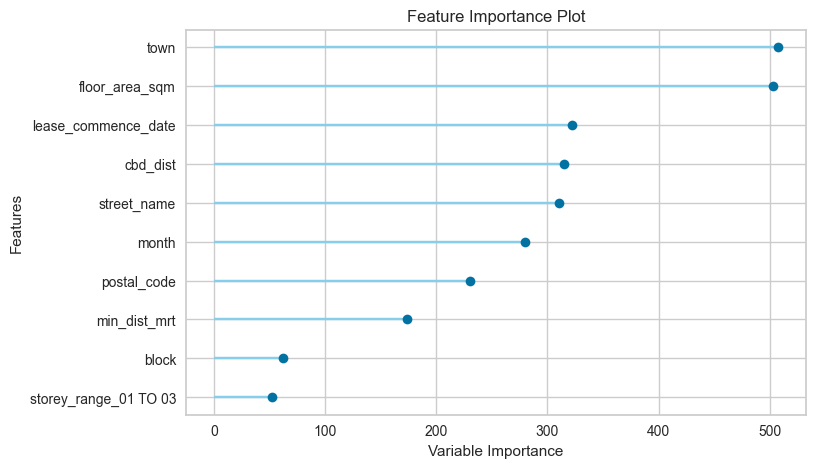

In [21]:
plot_model(best, plot = 'feature')

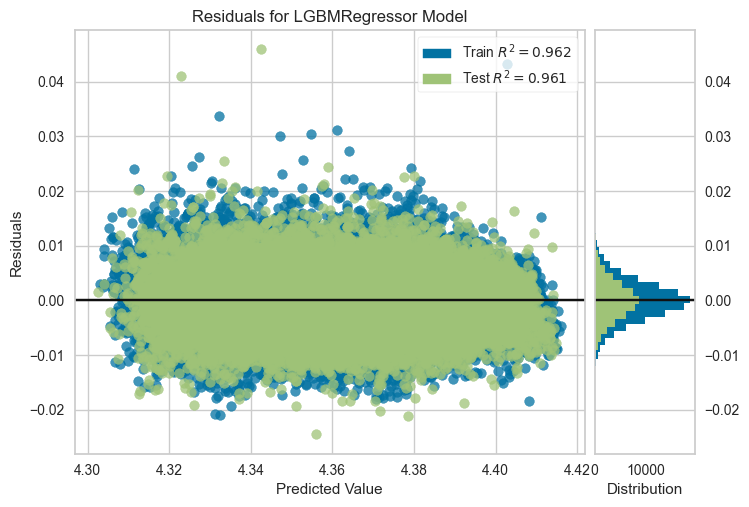

In [22]:
plot_model(best, plot = 'residuals')

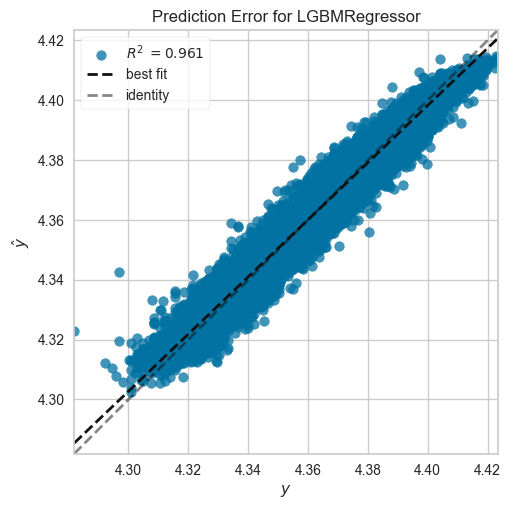

In [23]:
plot_model(best, plot = 'error')

In [24]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [25]:
tuned_best = tune_model(best)

Initiated  . . . . . . . . . . . . . . . . . .              15:30:36
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


From the above output, we can see that original light gradient boosting algorithm has a higher R-square value, lower mean squared error and mean absoulte error as compared to the tunned cross validation result. With that, the original model will be used for prediction.

In [26]:
print(best)

LGBMRegressor(n_jobs=-1, random_state=123)


In [27]:
final_best = finalize_model(best)
print(final_best)

Pipeline(memory=FastMemory(location=C:\Users\SHIMIN~1\AppData\Local\Temp\joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['postal_code', 'floor_area_sqm',
                                             'lease_commence_date', 'cbd_dist',
                                             'min_dist_mrt']...
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['block', 'street_name', 'town',
                                             'month'],
                                    transformer=LeaveOneOutEncoder(cols=['block',
                                                                         'street_name',
                                                                    

#### Testing on unseen data

In [29]:
# display any scientific values
pd.set_option('display.float_format', lambda x: '%.3f' % x)

predictions = predict_model(final_best, data = hdb_unseen)

In [30]:
predictions.head()

block           street_name        town  postal_code    month flat_type  \
0   603   ANG MO KIO AVENUE 5  ANG MO KIO       560603  2015-01    3 ROOM   
1   471  ANG MO KIO AVENUE 10  ANG MO KIO       560471  2015-01    3 ROOM   
2   152   ANG MO KIO AVENUE 5  ANG MO KIO       560152  2015-01    3 ROOM   
3   121   ANG MO KIO AVENUE 3  ANG MO KIO       560121  2015-01    3 ROOM   
4   223   ANG MO KIO AVENUE 1  ANG MO KIO       560223  2015-01    4 ROOM   

  storey_range  floor_area_sqm      flat_model  lease_commence_date  latitude  \
0     07 TO 09          67.000  New Generation                 1980     1.380   
1     07 TO 09          67.000  New Generation                 1979     1.363   
2     04 TO 06          82.000  New Generation                 1981     1.377   
3     07 TO 09          67.000  New Generation                 1978     1.370   
4     04 TO 06          92.000  New Generation                 1978     1.366   

   longitude  cbd_dist  min_dist_mrt  resale_price  prediction_label  
0    103.836 10886.293      1040.755    290000.000        296743.329  
1    103.857  8917.812      1041.759    319000.000        304805.549  
2    103.840 10433.425       770.823    340000.000        346299.682  
3    103.844  9626.521       661.676    345000.000        320984.160  
4    103.838  9299.392      1315.400    423000.000        413818.189

In [31]:
# save model pipeline to use for web application
save_model(final_best, '../../models/hdb_lightgbm_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\SHIMIN~1\AppData\Local\Temp\joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['postal_code', 'floor_area_sqm',
                                              'lease_commence_date', 'cbd_dist',
                                              'min_dist_mrt']...
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper(include=['block', 'street_name', 'town',
                                              'month'],
                                     transformer=LeaveOneOutEncoder(cols=['block',
                                                                          'street_name',
                                                       

### Register Model to mlflow

In [45]:
# runs are found under mlflow experiments first lightgbm (finalized model)
result = mlflow.register_model(
    "runs:/a85ac193ae8443ca967d61cbd339a311/model", "hdb_best_regression_model"
)

Registered model 'hdb_best_regression_model' already exists. Creating a new version of this model...
2023/08/21 16:10:25 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: hdb_best_regression_model, version 4
Created version '4' of model 'hdb_best_regression_model'.


In [41]:
!mlflow ui

^C
